In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

df = pd.read_csv("datasets/PSL-DATA.csv")

df = df.sample(frac=1)

# dropping the columns we will not be using
df = df.drop('MP' , axis = 1) 
df = df.drop('W' , axis = 1) 
df = df.drop('L' , axis = 1)
df = df.drop('D' , axis = 1)
df = df.drop('GF' , axis = 1) 
df = df.drop('GD' , axis = 1) 
df = df.drop('GA' , axis = 1) 
df = df.drop('Pts' , axis = 1) 


# # clustering data with a similar rank
# df.loc[df['Rk'].between(1, 2, 'both'), 'grade'] = 'A'
# df.loc[df['Rk'].between(3, 4, 'right'), 'grade'] = 'B'
# df.loc[df['Rk'].between(5, 6, 'right'), 'grade'] = 'C'
# df.loc[df['Rk'].between(12, 16, 'right'), 'grade'] = 'D'
# df.loc[df['Rk'].between(16, 20, 'right'), 'grade'] = 'E'
# df.loc[df['Rk'].between(16, 20, 'right'), 'grade'] = 'E'

# #factorize team names
# df['Rk']=df['Rk'].replace({1: "A" ,'2': "A", '3':"B" , '4':"B" , '5':"C" , '6': "C" , '7':"D" , '8': "D" , '9': "E"  , '10':"E" ,
#                           '11': "F" , '12': "F" , '13':"G" , '14': "G" , '15': "H" , '16': "H" })

# df = df.drop('Rk' , axis = 1)

X = df.drop('Rk' , axis = 1)

y = df['Rk']

# features = ['GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90',
#        'WinRate', 'DrawRate']

print(df.columns)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

df.head()


Index(['Rk', 'Pts/MP', 'GF/GA', 'Win Rate', 'Draw Rate', 'Lose Rate'], dtype='object')


,Rk,Pts/MP,GF/GA,Win Rate,Draw Rate,Lose Rate
100,C,1.60,1.45,0.40,0.40,0.20
132,C,1.47,0.97,0.40,0.27,0.33
86,D,1.30,1.00,0.30,0.40,0.30
24,E,1.33,0.88,0.30,0.43,0.27
110,H,0.93,0.60,0.17,0.43,0.40


In [9]:
from sklearn import neighbors
import matplotlib.pyplot as plt 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train , y_train)

knn_pred = knn.predict(X_test)


print(classification_report(knn_pred , y_test))

# print(knn.score(X_test , y_test))

              precision    recall  f1-score   support

           A       0.80      1.00      0.89         4
           B       1.00      0.56      0.71         9
           C       0.00      0.00      0.00         1
           D       0.67      0.67      0.67         3
           E       0.75      1.00      0.86         3
           F       1.00      0.50      0.67         2
           G       0.75      1.00      0.86         3
           H       1.00      1.00      1.00         4

    accuracy                           0.76        29
   macro avg       0.75      0.72      0.71        29
weighted avg       0.85      0.76      0.77        29



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

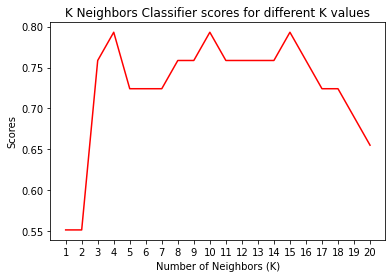

In [10]:
#using less features
from sklearn import neighbors
import matplotlib.pyplot as plt 

knn_scores = []
for k in range(1,21):
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

some_list = [round(x , 2) for x in knn_scores]

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
# for i in range(1,21):
#     plt.text(i, some_list[i-1], (i, some_list[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print(model.score(X_test ,y_test))

print(classification_report(y_test , y_pred))

feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(features , feature_imp)
plt.show()

0.7931034482758621
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       0.83      1.00      0.91         5
           C       1.00      0.67      0.80         3
           D       1.00      0.33      0.50         3
           E       0.60      0.75      0.67         4
           F       1.00      1.00      1.00         1
           G       0.67      0.50      0.57         4
           H       0.67      1.00      0.80         4

    accuracy                           0.79        29
   macro avg       0.85      0.78      0.78        29
weighted avg       0.82      0.79      0.78        29



NameError: name 'features' is not defined

In [18]:
from numpy import loadtxt
dataset = loadtxt("datasets/PSL-DATA-NEW.csv", delimiter=',')

X_new = dataset[:,0:5]

y_new = knn.predict(X_new)
# y_new = neigh.predict(X_new)
# y_new = ridge_model.predict(X_new)

print(y_new)


['A' 'B' 'B' 'B' 'E' 'E' 'A' 'A' 'D' 'A' 'G' 'C' 'H' 'G' 'H' 'H']


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
